# Test 1. $P_{\rm err}$ vs. average photon energy

In [1]:
# run once before all the other code
import numpy as np
import matplotlib.pyplot as plt
from QI import *

%matplotlib inline
from matplotlib import rc
rc('xtick', labelsize=14) 
rc('ytick', labelsize=14) 
np.set_printoptions(threshold='nan', precision=6, suppress=True)

In [3]:
data = {}
data['TMSS'] = np.loadtxt("./data_figs/qcb_tmss.csv", delimiter=',')
data['PS'] = np.loadtxt("./data_figs/qcb_ps.csv", delimiter=',')
data['PA'] = np.loadtxt("./data_figs/qcb_pa.csv", delimiter=',')
data['PSA'] = np.loadtxt("./data_figs/qcb_psa.csv", delimiter=',')
data['PAS'] = np.loadtxt("./data_figs/qcb_pas.csv", delimiter=',')

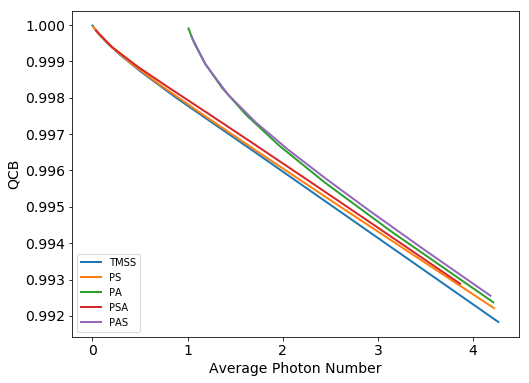

In [6]:
plt.figure(figsize=(8, 6))
for state in ('TMSS', 'PS', 'PA', 'PSA', 'PAS'):
    plt.plot(data[state][1], data[state][2], lw=2, label=state)
plt.legend(loc=3)
# plt.ylim([0.99, 1])
# plt.xlim([0, 3])
plt.ylabel('QCB', fontsize=14)
plt.xlabel('Average Photon Number', fontsize=14)

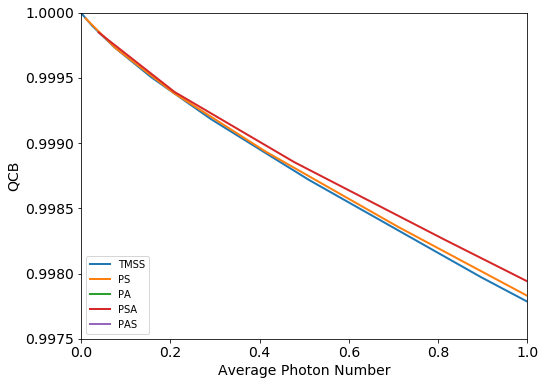

In [10]:
plt.figure(figsize=(8, 6))
for state in ('TMSS', 'PS', 'PA', 'PSA', 'PAS'):
    plt.plot(data[state][1], data[state][2], lw=2, label=state)
plt.legend(loc=3)
plt.ylim([0.9975, 1])
plt.xlim([0, 1])
plt.ylabel('QCB', fontsize=14)
plt.xlabel('Average Photon Number', fontsize=14)

# Test 2. qutip ```norm()``` function

The norm of a state $\rho$ is defined as $\| \rho \| \equiv \sqrt{\rho^{\dagger} \rho}$

In [11]:
from qutip import *
import numpy as np
import matplotlib.pyplot as plt
# from scipy.special import comb, factorial

from QI import *

In [12]:
state = coherent_dm(5,1)

In [13]:
state

Quantum object: dims = [[5], [5]], shape = (5, 5), type = oper, isherm = True
Qobj data =
[[ 0.367911  0.367744  0.261054  0.146207  0.088267]
 [ 0.367744  0.367577  0.260936  0.14614   0.088227]
 [ 0.261054  0.260936  0.185233  0.103742  0.062631]
 [ 0.146207  0.14614   0.103742  0.058102  0.035077]
 [ 0.088267  0.088227  0.062631  0.035077  0.021176]]

In [14]:
state.norm()

1.0000000000000002

In [15]:
state_test = basis(2,0) + basis(2,1)

In [16]:
state_test

Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
Qobj data =
[[ 1.]
 [ 1.]]

In [17]:
state_test.norm()

1.4142135623730951

# Test 3. Quitp `eigenstates()` function

In [18]:
from qutip import *
import numpy as np
import matplotlib.pyplot as plt
# from scipy.special import comb, factorial

from QI import *

In [19]:
Nth = 0.1     # Average thermal photon numbers
N = 10        # Truncated photon numbers, i.e., 0 ~ N-1
eta = 0.01    # Transmissivity

Ns = 0.01     # Average photon number of the initial two-mode squeezed states
lmd = np.sqrt(Ns/(1 + Ns))     # 
s = np.arcsinh(np.sqrt(Ns))    # Squeezed parameter

In [20]:
rho_0 = RHO_0(TMSS, N, lmd, Nth)
rho_1 = RHO_1(TMSS, N, lmd, Nth, eta)

In [21]:
rho_0.data

<100x100 sparse matrix of type '<type 'numpy.complex128'>'
	with 40 stored elements in Compressed Sparse Row format>

In [22]:
rho_1.data

<100x100 sparse matrix of type '<type 'numpy.complex128'>'
	with 226 stored elements in Compressed Sparse Row format>

In [23]:
gamma = 0.5*rho_1 - 0.5*rho_0

In [24]:
eigval, eigvect = gamma.eigenstates(sparse=True, sort='high')

In [25]:
sum(abs(eigval))

0.0094413487267620087

In [26]:
gamma.norm()

0.0094413487267620139

In [27]:
(1 - gamma.norm()) / 2.0

0.49527932563661897

In [28]:
Helstrom(0.5, rho_0, 0.5, rho_1)

0.49527932563661897

In [29]:
0.5 * QCB(rho_0, rho_1, approx=True)

0.4999571000242818